In [1]:
#perintah-perintah di bawah digunakan untuk mengambil fungis-fungsi dari suatu library tertentu
import numpy as np #berfungsi untuk memanggil import numpy yang diinisialkan dengan np
#library numpy digunakan untuk membuat array dan matriks
import cv2 #library cv2 digunakan untuk memodifikasi gambar
import matplotlib.pyplot as plt #berfungsi untuk memanggil import matplotlib.pyplot yang diinisialkan dengan plt
#library matplotlib digunakan untuk membuat sebuah visualisasi/diagram
import matplotlib.image as npimage #berfungsi untuk memanggil import matplotlib.image yang diinisialkan dengan npimage
#berfungsi untuk membaca gambar import

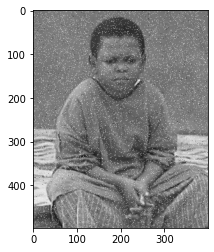

In [2]:
gambar = cv2.imread("modul5.jpeg") #untuk mengimport modul5.jpeg kedalam variabel gambar
gmbr = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
#fungsi cv2.cvtColor digunakan untuk mengubah basis warna file, yang kemudian akan dimasukkan ke dalam variabel gmbr
#kemudian warna akan dirubah dari bgr menjadi grayscale menggunakan cv2.COLOR_BGR2GRAY dan dimasukkan ke variabel gmbr

#menampilkan gambar 
plt.imshow(gmbr, cmap='gray')
#plt.imshow digunakan untuk menampilkan gambar bersamaan dengan diagram jumlah baris dan kolomnya
#gambar yang ditampilkan adalah gambar dari variabel gmbr, dengan skala warna abu yang dipanggil dengan perintah cmap='gray'

MEDIAN

In [3]:
#membuat sebuah fungsi median dengan parameternya yaitu matriks
def median (matriks):
    #menginisialisasi variabel baris dan kolom dengan nilai matriks.shape sebagai ukuran matriks
    baris,kolom = matriks.shape
    #variabel n berfungsi untuk menyumpan hasil perkalian dari baris dan kolom
    n = baris*kolom
    #variabel array akan menyimpan maatriks yang telah diurutkan menggunakan library nummpy dan fungsi sort di dalamnya
    array = np.sort(matriks, axis=None)
    #dilakukan pengecekan pada n, apabila dapat dibagi 2 atau genap dapat melakukan perintah selanjutnya
    if n%2 == 0:
        a = array[n//2]
        b = array[n//2 - 1]
        c = (a + b)/2
    #jika n tidak genap atau ganjil dapat langsung menjalankan perintah c
    else:
        c = array[n//2]
    #membalikan nilai c 
    return c


In [4]:
#membuat sebuah fungsi medianFilter dengan parameternya yaitu image, baris, kolom
def medianFilter(image, baris, kolom):
    #membuat variabel hasil untuk menyimpan ukuran citra setiap pixelnya bernilai 0
    hasil = np.zeros(image.shape) 
    #membuat variabel baris2 dan kolom2 dengan nilai dari variabel baris dikurangi 1 lalu dibagi 2, begitu pula dengan
    #kolom dikurang 1 lalu dibagi 2. ini bertujuan untuk mencari nilai tengah dari baris dan kolom pada citra
    baris2, kolom2 = int((baris-1)/2), int((kolom-1)/2)
    #membuat variabel padding yang akan melakukan padding pada citra dengan menggunakan fungsi pad pada numpy 
    padding = np.pad(image, ((baris2,baris-(baris2-1)),(kolom2,kolom-(kolom2-1))), "constant")    
    #melakukan perulangan i sebanyak ukuran pangjang citra dengan menggunakan fungsi len
    for i in range(len(image)):
        #melakukan perulangan j didalam perulangan i sebanyak ukuran pangjang citra pada indeks ke i dengan menggunakan fungsi len
        for j in range(len(image[i])):
            #menginisialisasikan variabel hasil dengan array hasil looping array i j sebelumnya berisi 
            #pemanggilan fungsi median yang diisi dengan padding yang telah di cari sebelumnya.
            hasil[i,j] = median(padding[i:i+baris, j:j+kolom])
    #mengembalikan nilai hasil 
    return hasil

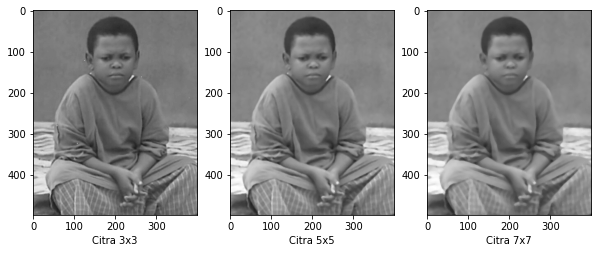

In [5]:
plt.figure(figsize=(10,10))

plt.subplot(131)
plt.xlabel('Citra 3x3')
plt.imshow(medianFilter(gmbr, 3,3), cmap = 'gray')

plt.subplot(132)
plt.xlabel('Citra 5x5')
plt.imshow(medianFilter(gmbr,5,5), cmap = 'gray')

plt.subplot(133)
plt.xlabel('Citra 7x7')
plt.imshow(medianFilter(gmbr,7,7), cmap = 'gray')

MEAN

In [6]:
#membuat sebuah fungsi mean dengan parameternya yaitu matriks
def mean (matriks):
    #membuat variabael m yang berfungsi untuk menyimpan hasil penjumlahan nilai matriksnya
    m = np.sum (matriks)
    #menginisialisasi variabel baris dan kolom dengan nilai matriks.shape sebagai ukuran matriks
    baris, kolom = matriks.shape
    #membalikkan nilai hasil dari m dibagi hasil perkalian baris dan kolom
    return (m/(baris*kolom))

In [7]:
#membuat sebuah fungsi medianFilter dengan parameternya yaitu image, baris, kolom
def meanFilter (image, baris, kolom):
    #membuat variabel hasil untuk menyimpan ukuran citra setiap pixelnya bernilai 0
    hasil = np.zeros(image.shape) 
    #membuat variabel baris2 dan kolom2 dengan nilai dari variabel baris dikurangi 1 lalu dibagi 2, begitu pula dengan
    #kolom dikurang 1 lalu dibagi 2. ini bertujuan untuk mencari nilai tengah dari baris dan kolom pada citra
    baris2, kolom2 = int((baris-1)/2), int((kolom-1)/2)
    #membuat variabel padding yang akan melakukan padding pada citra dengan menggunakan fungsi pad pada numpy 
    padding = np.pad(image, ((baris2,baris-(baris2-1)),(kolom2,kolom-(kolom2-1))), "constant")    
    #melakukan perulangan i sebanyak ukuran pangjang citra dengan menggunakan fungsi len
    for i in range(len(image)):
        #melakukan perulangan j didalam perulangan i sebanyak ukuran pangjang citra pada indeks ke i dengan menggunakan fungsi len
        for j in range(len(image[i])):
            #menginisialisasikan variabel hasil dengan array hasil looping array i j sebelumnya berisi 
            #pemanggilan fungsi median yang diisi dengan padding yang telah di cari sebelumnya.
            hasil[i,j] = mean(padding[i:i+baris, j:j+kolom])
    #membalikan nilai hasil   
    return hasil

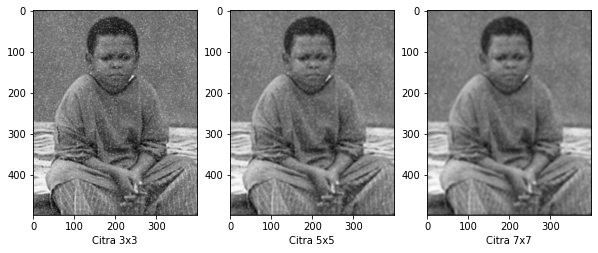

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(131)
plt.xlabel('Citra 3x3')
plt.imshow(meanFilter(gmbr, 3,3), cmap = 'gray')

plt.subplot(132)
plt.xlabel('Citra 5x5')
plt.imshow(meanFilter(gmbr,5,5), cmap = 'gray')

plt.subplot(133)
plt.xlabel('Citra 7x7')
plt.imshow(meanFilter(gmbr,7,7), cmap = 'gray')

MODUS

In [9]:
#membuat sebuah fungsi mean dengan parameternya yaitu matriks
def modus(matriks):
    #variabel p akan menyimpan maatriks yang telah diurutkan menggunakan library nummpy dan fungsi sort di dalamnya
    p = np.sort (matriks, axis=None)
    #membuat variabel indeks untuk menyimpan nilai nol dari nilai maksimal matriks dan menjumlahkannya dengan 1
    indeks = np.zeros(np.max(p)+1, dtype = int)

    for i in range (len(p)):
        indeks[p[i]] += 1
    maks = np.max(indeks)
    
    for j in range (len(indeks)):
        if (indeks[j] == maks):
            return j

In [10]:
#membuat sebuah fungsi medianFilter dengan parameternya yaitu image, baris, kolom
def modusFilter (image, baris, kolom):
    #membuat variabel hasil untuk menyimpan ukuran citra setiap pixelnya bernilai 0
    hasil = np.zeros(image.shape) 
    #membuat variabel baris2 dan kolom2 dengan nilai dari variabel baris dikurangi 1 lalu dibagi 2, begitu pula dengan
    #kolom dikurang 1 lalu dibagi 2. ini bertujuan untuk mencari nilai tengah dari baris dan kolom pada citra
    baris2, kolom2 = int((baris-1)/2), int((kolom-1)/2)
    #membuat variabel padding yang akan melakukan padding pada citra dengan menggunakan fungsi pad pada numpy
    padding = np.pad(image, ((baris2,baris-(baris2-1)),(kolom2,kolom-(kolom2-1))), "constant")
    #melakukan perulangan i sebanyak ukuran pangjang citra dengan menggunakan fungsi len
    for i in range(len(image)):
        #melakukan perulangan j didalam perulangan i sebanyak ukuran pangjang citra pada indeks ke i dengan menggunakan fungsi len
        for j in range(len(image[i])):
            #menginisialisasikan variabel hasil dengan array hasil looping array i j sebelumnya berisi 
            #pemanggilan fungsi median yang diisi dengan padding yang telah di cari sebelumnya.
            hasil[i,j] = modus(padding[i:i+baris, j:j+kolom])
    #membalikan nilai hasil
    return hasil

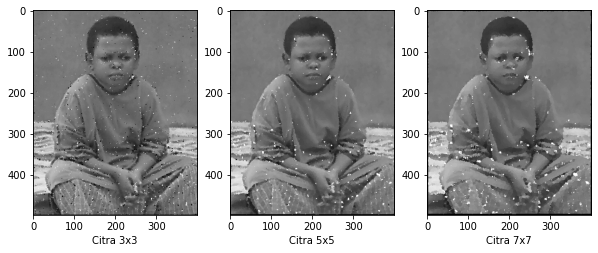

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(131)
plt.xlabel('Citra 3x3')
plt.imshow(modusFilter(gmbr, 3,3), cmap = 'gray')

plt.subplot(132)
plt.xlabel('Citra 5x5')
plt.imshow(modusFilter(gmbr,5,5), cmap = 'gray')

plt.subplot(133)
plt.xlabel('Citra 7x7')
plt.imshow(modusFilter(gmbr,7,7), cmap = 'gray')